# Лабораторная работа по нейроинформатике №3

Выполнил: _Коростелев Д.В._ Группа: _М8О-408Б-18_ Вариант: _11_

#### Используемые пакеты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import math
import os
from sklearn.model_selection import train_test_split
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

#### Вариант 11

#### Условие к первому заданию

In [2]:
class elipse:
    def __init__(self, _a, _b, _alpha, _x, _y):
        self.a = _a
        self.b = _b
        self.alpha = _alpha
        self.x = _x
        self.y = _y
    
    def point(self, angle):
        p = (self.a * math.cos(angle), self.b * math.sin(angle)) #вычисляем точку
         # поворачиваем точки на угло альфа
        r = [p[0] * math.cos(self.alpha) - p[1] * math.sin(self.alpha),
             p[0] * math.sin(self.alpha) + p[1] * math.cos(self.alpha)]
        return [r[0] + self.x, r[1] + self.y]
    
    def gen_points(self, count):
        return np.array([self.point(angle) for angle in np.linspace(0, 2.0 * math.pi, count)])
    
    def draw(self, count):
        points = self.gen_points(count)
        transposed = np.transpose(points)
        plt.plot(transposed[0], transposed[1])
        return points
        
elipse_a = elipse(0.4, 0.15, math.pi/3.0, -0.2, -0.18)
elipse_b = elipse(0.7, 0.5, -math.pi/3.0, -0.2, -0.18)
elipse_c = elipse(1.0, 1.0, 0.0, 0.0, 0.0)

#### Решение

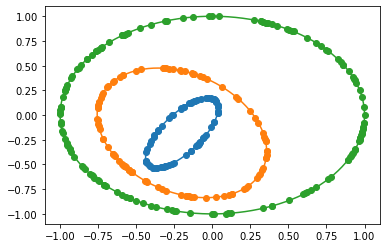

In [3]:
points_of_elipse_a = elipse_a.draw(400)
points_of_elipse_b = elipse_b.draw(400)
points_of_elipse_c = elipse_c.draw(400)

def get_random_points_from_array(array, count):
    return array[np.random.choice(len(array), count)]
def draw_single_points(points):
    transposed = np.transpose(points)
    plt.scatter(transposed[0], transposed[1])

random_points_of_elipse_a = get_random_points_from_array(points_of_elipse_a, 80)
random_points_of_elipse_b = get_random_points_from_array(points_of_elipse_b, 100)
random_points_of_elipse_c = get_random_points_from_array(points_of_elipse_c, 150)

draw_single_points(random_points_of_elipse_a)
draw_single_points(random_points_of_elipse_b)
draw_single_points(random_points_of_elipse_c)
plt.show()

In [4]:

features = np.concatenate((random_points_of_elipse_a, random_points_of_elipse_b, random_points_of_elipse_c))
labels = np.concatenate((np.full(len(random_points_of_elipse_a), 0),
                         np.full(len(random_points_of_elipse_b), 1),
                         np.full(len(random_points_of_elipse_c), 2)))
total_size = len(random_points_of_elipse_a) + len(random_points_of_elipse_b) + len(random_points_of_elipse_c)

x_train, x_test_valid, y_train, y_test_valid = train_test_split(features, labels, test_size=0.25, random_state=23)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.4, random_state=26)

model = keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
    #loss=keras.losses.MeanSquaredError(),
    #loss=keras.losses.MeanSquaredLogarithmicError(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

print("TRAINING")
model.fit(x_train, y_train, batch_size=16, epochs=300, verbose=2)

TRAINING
Epoch 1/300
16/16 - 0s - loss: 1.1381 - accuracy: 0.3401
Epoch 2/300
16/16 - 0s - loss: 1.1016 - accuracy: 0.3806
Epoch 3/300
16/16 - 0s - loss: 1.0760 - accuracy: 0.3765
Epoch 4/300
16/16 - 0s - loss: 1.0548 - accuracy: 0.3927
Epoch 5/300
16/16 - 0s - loss: 1.0357 - accuracy: 0.4089
Epoch 297/300
16/16 - 0s - loss: 0.1966 - accuracy: 0.9879
Epoch 298/300
16/16 - 0s - loss: 0.1953 - accuracy: 0.9919
Epoch 299/300
16/16 - 0s - loss: 0.1943 - accuracy: 0.9919
Epoch 300/300
16/16 - 0s - loss: 0.1933 - accuracy: 0.9919


In [5]:
print("VALIDATION")
model.evaluate(x_valid, y_valid, verbose=1)
print("TESTING")
model.evaluate(x_test, y_test, verbose=1)

VALIDATION
2/2 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9592
TESTING
2/2 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 1.0000


[0.18392908573150635, 1.0]

In [6]:
def get_grid(left, right, bottom, top, step):
     x = np.arange(left, right, step)
     y = np.arange(bottom, top, step)
     xx,yy = np.meshgrid(x,y)
     return np.array((xx.ravel(), yy.ravel())).T
    
grid = get_grid(-1.2, 1.2, -1.2, 1.2, 0.07)
print(grid)

[[-1.2  -1.2 ]
 [-1.13 -1.2 ]
 [-1.06 -1.2 ]
 ...
 [ 1.04  1.18]
 [ 1.11  1.18]
 [ 1.18  1.18]]


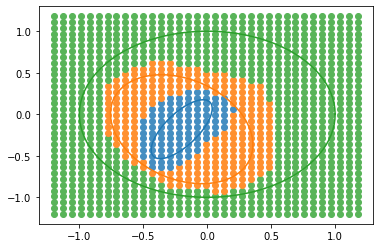

In [7]:
classes=np.argmax(model.predict(grid) ,axis=1)
elipse_a.draw(100)
elipse_b.draw(100)
elipse_c.draw(100)

def draw_by_classes(points, classes, colors):
    for point, clas in zip(points, classes):
        plt.scatter(point[0], point[1], color=colors[clas])

draw_by_classes(grid, classes, ['#458EC1', '#FF902F', '#59B459'])

#### Условие к заданию 2

In [8]:
function = lambda t : np.cos(np.square(t))
interval, step = (0.0, 4.0), 0.02

#### Задание 2

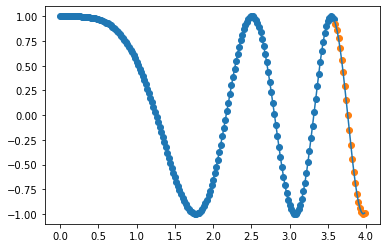

In [53]:
features = np.arange(interval[0], interval[1], step)
labels = function(features)
plt.plot(features, labels)
split_index = int(len(features)*0.9)
x_train, x_test, y_train, y_test = features[:split_index], features[split_index:], labels[:split_index], labels[split_index:]
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

In [54]:
model_for_function = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(10, activation='tanh'),
    layers.Dense(10, activation='tanh'),
    layers.Dense(1)
])
model_for_function.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    loss=keras.losses.MeanSquaredError(),
    metrics=["mse"]
)
model_for_function.fit(x_train, y_train, epochs=600, batch_size=20)

Epoch 1/600
9/9 [==============================] - 0s 1000us/step - loss: 0.8304 - mse: 0.8304
Epoch 2/600
9/9 [==============================] - 0s 1ms/step - loss: 0.6431 - mse: 0.6431
Epoch 3/600
9/9 [==============================] - 0s 1ms/step - loss: 0.5581 - mse: 0.5581
Epoch 596/600
9/9 [==============================] - 0s 1ms/step - loss: 2.7842e-04 - mse: 2.7842e-04
Epoch 597/600
9/9 [==============================] - 0s 876us/step - loss: 3.2706e-04 - mse: 3.2706e-04
Epoch 598/600
9/9 [==============================] - 0s 1ms/step - loss: 3.5658e-04 - mse: 3.5658e-04
Epoch 599/600
9/9 [==============================] - 0s 998us/step - loss: 3.1567e-04 - mse: 3.1567e-04
Epoch 600/600
9/9 [==============================] - 0s 872us/step - loss: 4.6638e-04 - mse: 4.6638e-04


In [55]:
print("TESTING")
model_for_function.evaluate(x_test, y_test, verbose=1)

TESTING
1/1 [==============================] - 0s 83ms/step - loss: 2.4452 - mse: 2.4452


[2.445180654525757, 2.445180654525757]

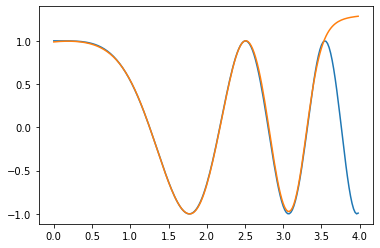

In [56]:
y_predicted = model_for_function.predict(features)
plt.plot(features, labels)
plt.plot(features, y_predicted)

#### Задание 3

In [105]:
features = np.arange(interval[0], interval[1], step/2)
labels = function(features)

In [106]:
model_for_function = keras.Sequential([
    keras.Input(shape=(1,)),
    layers.Dense(15, activation='relu', use_bias=True),
    layers.Dense(15, activation='tanh', use_bias=True),
    layers.Dense(1)
])
model_for_function.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.005),
    loss=keras.losses.MeanSquaredError(),
    metrics=["mse"]
)
model_for_function.fit(features, labels, epochs=1500, batch_size=20)

Epoch 1/1500
20/20 [==============================] - 0s 997us/step - loss: 0.5229 - mse: 0.5229
Epoch 2/1500
20/20 [==============================] - 0s 1ms/step - loss: 0.4687 - mse: 0.4687
Epoch 1499/1500
20/20 [==============================] - 0s 804us/step - loss: 0.0014 - mse: 0.0014
Epoch 1500/1500
20/20 [==============================] - 0s 824us/step - loss: 0.0014 - mse: 0.0014


In [107]:
print("TESTING")
model_for_function.evaluate(x_test, y_test, verbose=1)

TESTING
1/1 [==============================] - 0s 69ms/step - loss: 0.0053 - mse: 0.0053


[0.005321941338479519, 0.005321941338479519]

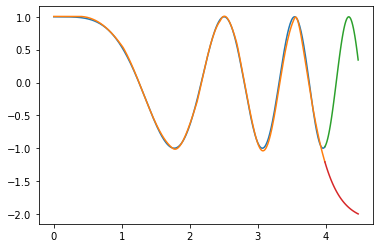

In [108]:
y_predicted = model_for_function.predict(features)
plt.plot(features, labels)
plt.plot(features, y_predicted)
x_try_predict = np.arange(features.tolist()[-1], features.tolist()[-1] + 0.5, 0.01)
y_try_predict = function(x_try_predict)
y_try_predicted = model_for_function.predict(x_try_predict)
plt.plot(x_try_predict, y_try_predict)
plt.plot(x_try_predict, y_try_predicted)

## Вывод

В ходе выполнения лабораторной работы удалось реализовать многослойную нейронную, которая способна классифицировать линейно неразделимые точки. 

Многослойные нейронные сети – универсальный инструмент, который способ с относительным успех решать задач как регрессионные задачи, так и классификационные. Однако к построению таких нейронных сетей стоит подходит с умом, так как простые нейронные сети требовательны, к данным, ко внутренней структуре - следует грамотно выбирать количество слоев и нейронов внутри каждого слоя. Так же особое внимание стоит уделить функциям активации и функциям ошибки, так как для каждой конкретной задачи следует подбирать свои функции активации и ошибки
